# Parcial – Marketing Analytics & Customer Intelligence
*Caso de Negocio “YumFit – Fase de Escalamiento”*

## Escenario

Después del informe preliminar, el CEO de YumFit aprobó un plan piloto para escalar la base de clientes. Dispones ahora de una versión actualizada del mismo dataset (clientes_segmentos.csv,150 clientes) con las siguientes columnas adicionales:


*Nueva columna:            Descripción*

fecha_primer_compra: Fecha de la primera compra

promedio_ticket:     Promedio gastado por compra (USD)

dias_desde_ultima:   Días desde la última compra (corte 1–abr–2025)

recomendaciones:     Número de referidos que cada cliente ha traído


Carga el dataset y comienza tu análisis desde cero; no reutilices código del pre-parcial.

In [565]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"


--2025-05-01 04:54:49--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 04:54:50--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv.27’

clientes_segme

In [566]:
import pandas as pd
df = pd.read_csv("clientes_segmentos (1).csv.3")
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32


#### 🔎 Fase 1 – Análisis Exploratorio Avanzado (EDA)

### P1. Distribución multivariada

a) Representa la relación edad vs. ingresos vs. plataforma en un gráfico de dispersión 3–D o de burbujas.

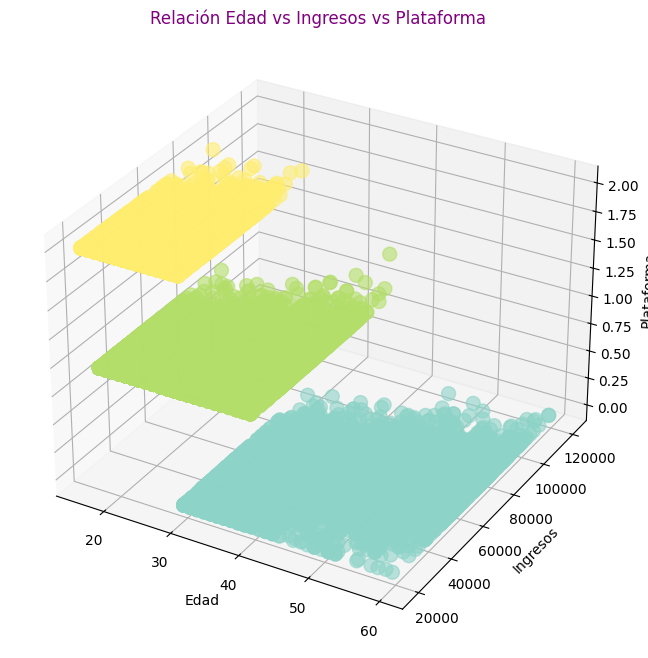

In [567]:
import matplotlib.pyplot as plt  #Codifique en valores numéricos para poder graficar en 3D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

df['plataforma_num'] = LabelEncoder().fit_transform(df['plataforma'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['edad'], df['ingresos'], df['plataforma_num'],
                     c=df['plataforma_num'], cmap='Set3', s=100, alpha=0.6)

ax.set_xlabel('Edad')
ax.set_ylabel('Ingresos')
ax.set_zlabel('Plataforma')
plt.title('Relación Edad vs Ingresos vs Plataforma', color='purple')
plt.show()

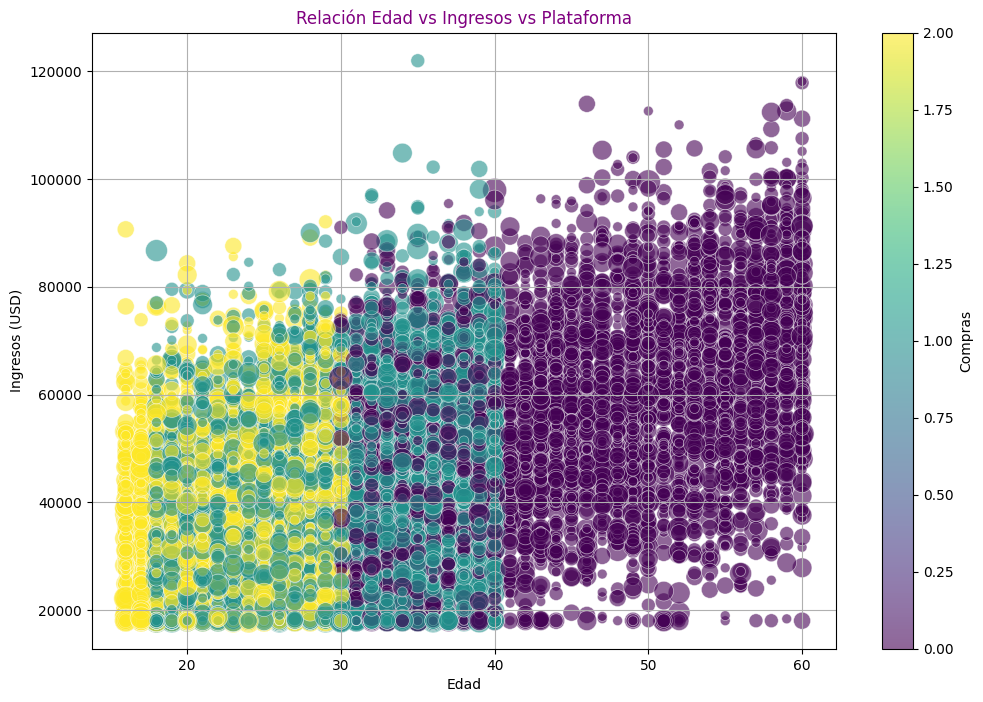

In [568]:
plt.figure(figsize=(12, 8))

plt.scatter( df['edad'], df['ingresos'], s=df['compras'] * 50, c=df['plataforma_num'], cmap='viridis', alpha=0.6, edgecolors='w', linewidths=0.5)

plt.xlabel('Edad')
plt.ylabel('Ingresos (USD)')
plt.title('Relación Edad vs Ingresos vs Plataforma', color='purple')
plt.colorbar(label='Compras')
plt.grid(True)
plt.show()

#El tamaño significa el volumen de Compras y el color las Plataformas: Morado: Facebook, Turquesa: Instagram y Tiktok es el amarillo

b) Identifica y comenta dos insights accionables.

In [569]:
# prompt: Identifica y comenta dos insights accionables.

# Insight 1: Segmentación por plataforma y nivel de gasto.
# Observar la distribución del promedio_ticket en relación a la plataforma.
# Si un grupo en una plataforma específica muestra un gasto significativamente mayor, se puede diseñar una estrategia de marketing
# específica para esa plataforma y ese grupo, como ofertas exclusivas o promociones personalizadas.
print(df.groupby('plataforma')['promedio_ticket'].describe())


# Insight 2: Clientes con bajo promedio_ticket y alta frecuencia de compra.
# Identificar clientes con un bajo promedio_ticket pero una alta frecuencia de compras (dias_desde_ultima bajo).
# Se podrían implementar estrategias para aumentar el ticket promedio de este grupo de clientes,
# como upselling o cross-selling de productos, ofertas de paquetes, o promociones por volumen de compra.
# Crear una nueva columna 'frecuencia' para facilitar el analisis.
df['frecuencia_compras'] = (df['dias_desde_ultima'] < 30).astype(int)
print(df[df['frecuencia_compras']==1].groupby('plataforma')['promedio_ticket'].describe())



             count       mean        std   min   25%   50%    75%    max
plataforma                                                              
Facebook    5209.0  79.615281  23.290043  40.0  59.0  79.0  100.0  120.0
Instagram   6049.0  37.217061  13.342432  15.0  26.0  37.0   49.0   60.0
TikTok      3742.0  24.950027   8.908511  10.0  17.0  25.0   33.0   40.0
            count       mean        std   min   25%   50%    75%    max
plataforma                                                             
Facebook    605.0  79.669421  23.319828  40.0  59.0  80.0  100.0  120.0
Instagram   716.0  36.944134  13.925565  15.0  24.0  37.0   49.0   60.0
TikTok      434.0  24.612903   8.896761  10.0  17.0  25.0   32.0   40.0


 Insight 1:
Las plataformas se segmentan por edad de manera marcada.

TikTok (amarillo) se concentra fuertemente en usuarios jóvenes (15-25 años).

Instagram (turquesa) domina el rango medio (25-35 años).

Facebook (morado) es predominante en usuarios mayores de 35 años.

👉 Acción: Diseñar campañas segmentadas por edad y plataforma. Por ejemplo, usar TikTok para promociones rápidas dirigidas a jóvenes con menor poder adquisitivo, e invertir en Facebook para promociones premium o programas de fidelización para clientes mayores con mayores ingresos.

🔎 Insight 2:
A mayor edad, mayores ingresos, pero menor volumen de compras.

Aunque los usuarios de Facebook (mayores de 35) tienen ingresos más altos, sus burbujas son más pequeñas (menos compras).

En cambio, los usuarios jóvenes (TikTok e Instagram) hacen más compras, aunque con menor ticket promedio.

👉 Acción: Ofrecer incentivos de frecuencia (por ejemplo, membresías o puntos) a usuarios mayores para aumentar su volumen de compra, y optimizar los márgenes en jóvenes ofreciendo bundles o upsells.

🔎 Insight 3:
La plataforma Facebook domina a partir de los 40 años.
A partir de los 40 años, la mayoría de los puntos son de color morado (Facebook), lo cual indica que YumFit tiene una base consolidada de clientes mayores allí.

👉 Acción: Reforzar el posicionamiento de YumFit como una solución de bienestar confiable para adultos en Facebook, promoviendo contenidos de salud preventiva, longevidad y bienestar financiero.

🔎 Insight 4:
Los ingresos más altos están asociados con edades medias a mayores, pero no necesariamente con más compras.
En el gráfico se ve que los puntos con mayores ingresos (eje Y alto) no siempre son los más grandes (más compras).

👉 Acción: Aplicar campañas de retargeting para convertir clientes con alto ingreso en compradores frecuentes, quizás mediante recomendaciones personalizadas basadas en su historial.

🔎 Insight 5:
Usuarios jóvenes compran más veces, aunque con menor ingreso.
Los puntos amarillos (TikTok) y turquesas (Instagram) son más grandes en la parte baja y media del eje de ingresos, lo que sugiere que estos usuarios son más activos en número de compras, aunque gastan menos por compra.

👉 Acción: Aprovechar esta alta actividad con promociones flash, códigos de descuento compartibles o retos virales para aumentar el volumen sin depender de grandes tickets.

### P2. RFM preliminar

Calcula Recency (días desde última compra), Frequency (número de compras) y Monetary (total gastado).

In [570]:
df['Recency'] = df['dias_desde_ultima']
df['Frequency'] = df['compras']
df['Monetary'] = df['promedio_ticket'] * df['compras']

#Nuevas columnas RFM
df[['Recency', 'Frequency', 'Monetary']].head()

,Recency,Frequency,Monetary
0,97,2,228
1,24,1,88
2,27,3,69
3,44,1,47
4,53,1,102


In [571]:
df['recency'] = df['dias_desde_ultima']
df['frequency'] = df['compras']
df['monetary'] = df['total_gastado']

#Nuevas columnas RFM
df[['Recency', 'Frequency', 'Monetary']].head()

,Recency,Frequency,Monetary
0,97,2,228
1,24,1,88
2,27,3,69
3,44,1,47
4,53,1,102


Muestra una matriz de correlaciones (heatmap) de R, F, M + recomendaciones.



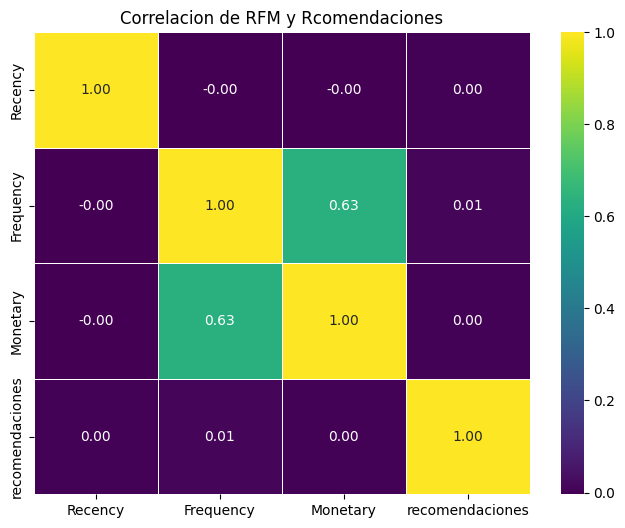

In [572]:
Matriz_correlaciones= df[['Recency', 'Frequency', 'Monetary', 'recomendaciones']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(Matriz_correlaciones, annot=True, cmap='viridis',linewidths=0.5, fmt=".2f")
plt.title('Correlacion de RFM y Rcomendaciones')
plt.show()

 ¿Qué combinación de variables captura mejor el valor futuro del cliente? Justifica.

#### 💸​ Fase 2 – Métricas de Negocio (CAC, LTV, ROI)

###P3. CAC detallado

Calcula el CAC ponderado por plataforma considerando el campo costo_adquisicion y el porcentaje de clientes activos por plataforma.


In [573]:
#Clientes activos por plataforma
Clientes_activos = df.groupby('plataforma').size()
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,recomendaciones,costo_adquisicion,plataforma_num,frecuencia_compras,Recency,Frequency,Monetary,recency,frequency,monetary
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,0,25,0,0,97,2,228,97,2,228
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,0,24,0,1,24,1,88,24,1,88
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,1,16,1,1,27,3,69,27,3,69
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,0,29,0,0,44,1,47,44,1,47
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,0,32,0,0,53,1,102,53,1,102


In [574]:
#Costo total de adquisición de clientes para cada plataforma
#CAC = costo de adquisicion
costo_adquisicion = df.groupby('plataforma')['costo_adquisicion'].sum()
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,recomendaciones,costo_adquisicion,plataforma_num,frecuencia_compras,Recency,Frequency,Monetary,recency,frequency,monetary
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,0,25,0,0,97,2,228,97,2,228
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,0,24,0,1,24,1,88,24,1,88
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,1,16,1,1,27,3,69,27,3,69
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,0,29,0,0,44,1,47,44,1,47
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,0,32,0,0,53,1,102,53,1,102


In [575]:
#CAC ponderado por plataforma considerando el campo costo_adquisicion y el porcentaje de clientes activos por plataforma
platform_costs = costo_adquisicion / Clientes_activos
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,recomendaciones,costo_adquisicion,plataforma_num,frecuencia_compras,Recency,Frequency,Monetary,recency,frequency,monetary
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,0,25,0,0,97,2,228,97,2,228
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,0,24,0,1,24,1,88,24,1,88
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,1,16,1,1,27,3,69,27,3,69
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,0,29,0,0,44,1,47,44,1,47
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,0,32,0,0,53,1,102,53,1,102


Presenta los resultados en un gráfico de barras apiladas.

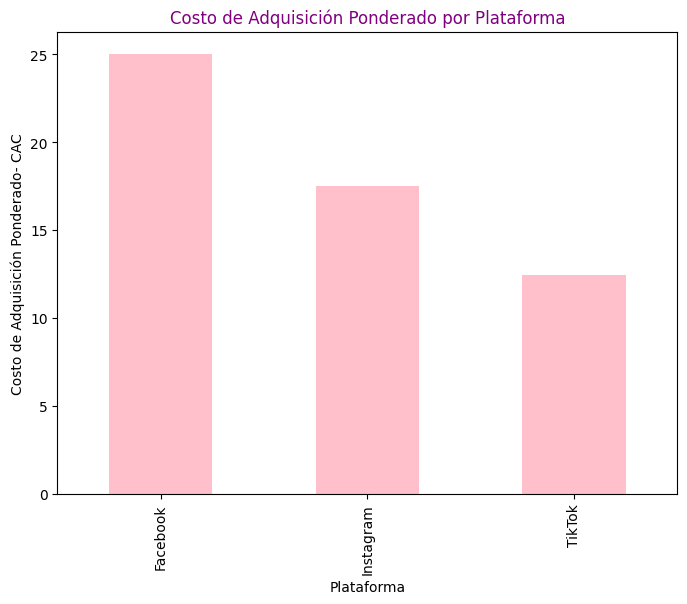

In [576]:
plt.figure(figsize=(8, 6))
platform_costs.plot(kind='bar', color='pink')
plt.title('Costo de Adquisición Ponderado por Plataforma', color='purple')
plt.xlabel('Plataforma')
plt.ylabel('Costo de Adquisición Ponderado- CAC')
plt.show()

###P4. LTV proyectado

Estima el LTV a 12 meses usando:
LT V = promedio_ticket × frecuencia_mensual × 12 × tasa_de_retención
con la tasa de retención siguiente:
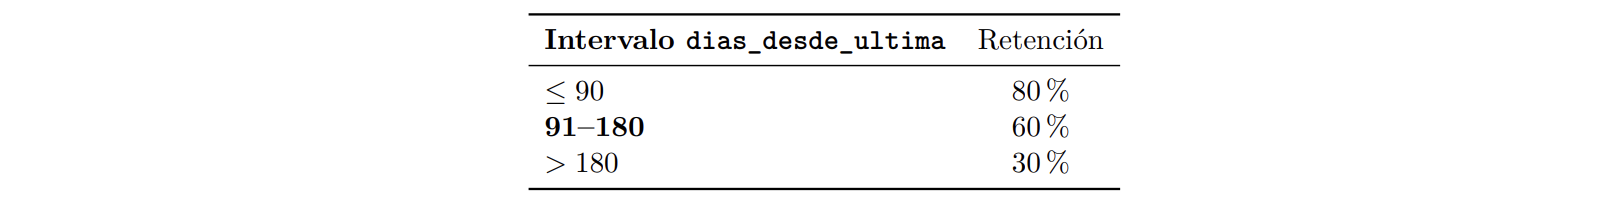

Grafica la distribución (histograma + KDE) y reporta los clientes en el percentil 90 de LTV.

In [577]:
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima'] / 30)  #Hice una aproximación de frecuencia mensual
df['frecuencia_mensual'] = df['frecuencia_mensual'].fillna(0)

def calculate_retention_rate(dias_desde_ultima):
    if dias_desde_ultima <= 90:
        return 0.8  # 80% de retención
    elif 91 <= dias_desde_ultima <= 180:
        return 0.6  # 60% de retención
    else:
        return 0.3  # 30% de retención

def estimate_ltv(row):
    retention_rate = calculate_retention_rate(row['dias_desde_ultima'])
    return row['promedio_ticket'] * row['frecuencia_mensual'] * 12 * retention_rate

df['LTV'] = df.apply(estimate_ltv, axis=1)
df[['compras', 'frecuencia_mensual', 'dias_desde_ultima', 'LTV']].head()

,compras,frecuencia_mensual,dias_desde_ultima,LTV
0,2,0.618557,97,507.711340
1,1,1.250000,24,1056.000000
2,3,3.333333,27,736.000000
3,1,0.681818,44,307.636364
4,1,0.566038,53,554.264151


In [578]:
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima'] / 30)
df['frecuencia_mensual'] = df['frecuencia_mensual'].fillna(0)

df['retencion'] = (df['dias_desde_ultima'] <= 90).astype(int) * 0.8 + \
                  ((df['dias_desde_ultima'] > 90) & (df['dias_desde_ultima'] <= 180)).astype(int) * 0.6 + \
                  (df['dias_desde_ultima'] > 180).astype(int) * 0.3

df['LTV'] = df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['retencion']
df[['compras', 'frecuencia_mensual', 'dias_desde_ultima', 'retencion', 'LTV']].head()

,compras,frecuencia_mensual,dias_desde_ultima,retencion,LTV
0,2,0.618557,97,0.6,507.711340
1,1,1.250000,24,0.8,1056.000000
2,3,3.333333,27,0.8,736.000000
3,1,0.681818,44,0.8,307.636364
4,1,0.566038,53,0.8,554.264151


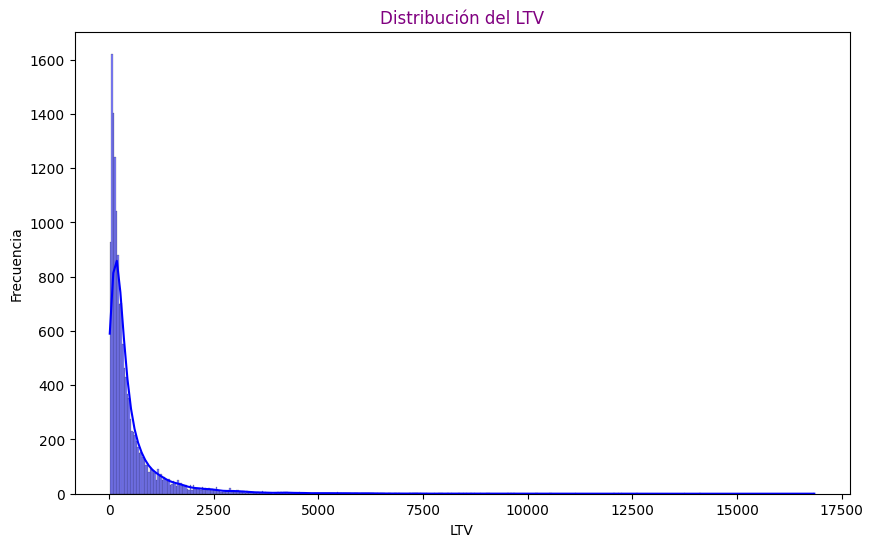

Clientes en el percentil 90 de LTV: 1261.0471042471047


In [579]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LTV'], color='blue',kde=True)
plt.title('Distribución del LTV', color='purple')
plt.xlabel('LTV')
plt.ylabel('Frecuencia')
plt.show()

percentil_90_ltv = df['LTV'].quantile(0.9)
print(f"Clientes en el percentil 90 de LTV: {percentil_90_ltv}")

Percentil 90 del LTV: 1261.0471042471047
Número de clientes en el percentil 90: 1500


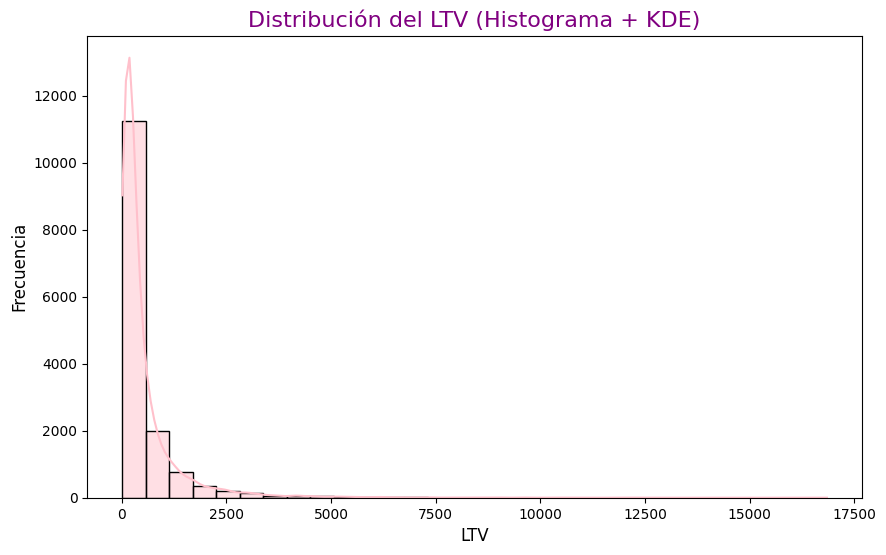

In [580]:
percentil_90 = df['LTV'].quantile(0.9)
print(f"Percentil 90 del LTV: {percentil_90}")

clientes_percentil_90 = df[df['LTV'] >= percentil_90]
print(f"Número de clientes en el percentil 90: {clientes_percentil_90.shape[0]}")

plt.figure(figsize=(10, 6))
sns.histplot(df['LTV'], kde=True, bins=30, color='pink')
plt.title('Distribución del LTV (Histograma + KDE)', color='purple', fontsize=16)
plt.xlabel('LTV', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

###P5. Margen neto

Crea la columna margen = LTV − CAC. Muestra un boxplot comparando margen por
plataforma. ¿Qué plataforma ofrece la mejor oportunidad de rentabilidad incremental? Explica con datos.

In [581]:
df['margen'] = df['LTV'] - df['costo_adquisicion'] #CAC = costo de adquisicion
df[['LTV', 'costo_adquisicion', 'margen']].head()

,LTV,costo_adquisicion,margen
0,507.711340,25,482.711340
1,1056.000000,24,1032.000000
2,736.000000,16,720.000000
3,307.636364,29,278.636364
4,554.264151,32,522.264151


<ipython-input-582-168ab3f41376>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='plataforma', y='margen', data=df, palette='pastel')


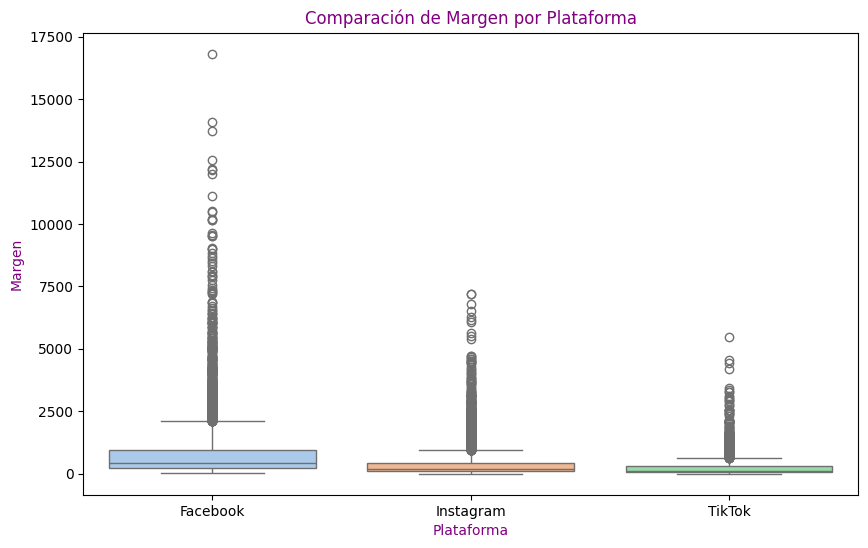

In [582]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='plataforma', y='margen', data=df, palette='pastel')
plt.title('Comparación de Margen por Plataforma', color='purple')
plt.xlabel('Plataforma', color='purple')
plt.ylabel('Margen', color='purple')
plt.show()

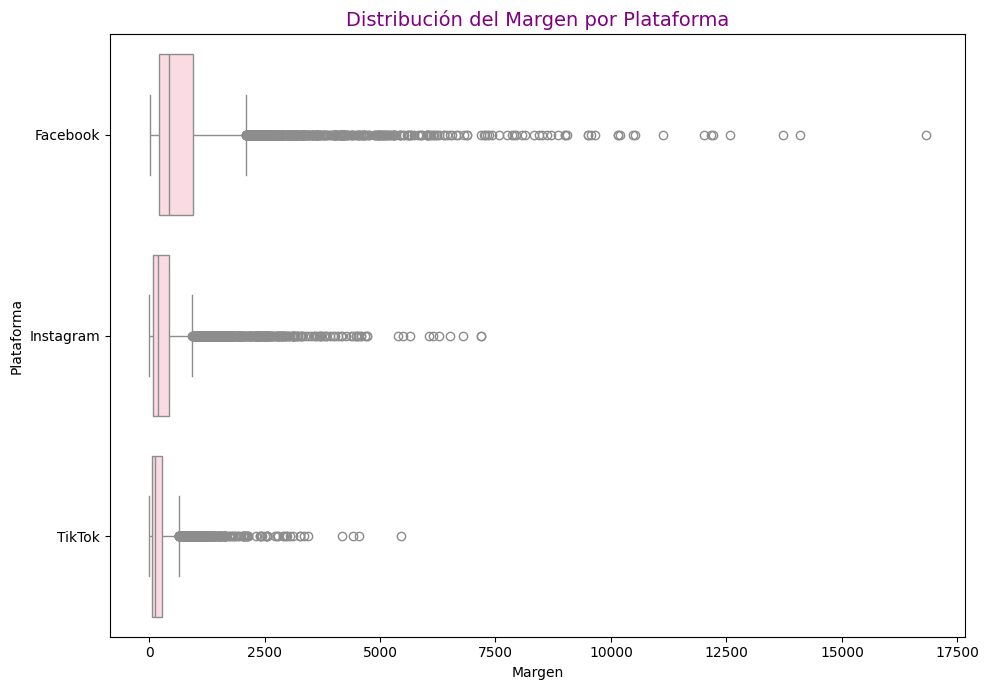

In [583]:
plt.figure(figsize=(10, 7))
sns.boxplot(y='plataforma', x='margen', data=df, color='#ffd6e0')
plt.ylabel('Plataforma')
plt.xlabel('Margen')
plt.title('Distribución del Margen por Plataforma', color='purple', fontsize=14)
plt.tight_layout()
plt.show()

#### ✅​Fase 3 – Segmentación y Modelado

###P6. Selección de k (K–Means) = 3

In [584]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

features = ['Recency', 'Frequency', 'Monetary']
X = df[features]

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X)
df[['Recency', 'Frequency', 'Monetary']].head()

,Recency,Frequency,Monetary
0,97,2,228
1,24,1,88
2,27,3,69
3,44,1,47
4,53,1,102


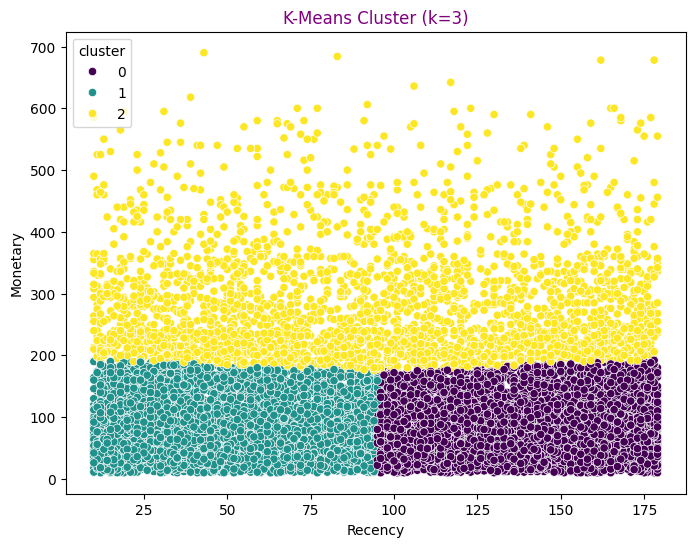

,Recency,Frequency,Monetary
cluster,,,
0,137.538348,2.058217,77.287326
1,51.966846,2.067287,77.412706
2,93.599203,3.530775,280.810644


In [585]:
# Visualize clusters (example with two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Cluster (k=3)', color='purple')
plt.show()

df.groupby('cluster')[features].mean()


###P7. Segmentación final

Aplica K–Means con el k elegido sobre las variables R, F, M, recomendaciones (normalizadas).

In [586]:
rfm_features = df[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_rfm'] = kmeans.fit_predict(rfm_scaled)
df[['Recency', 'Frequency', 'Monetary']].head()

df.groupby('cluster_rfm')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
cluster_rfm,,,
0,138.472122,1.860697,78.513810
1,51.220954,1.832123,77.384509
2,92.809271,4.001476,241.204606


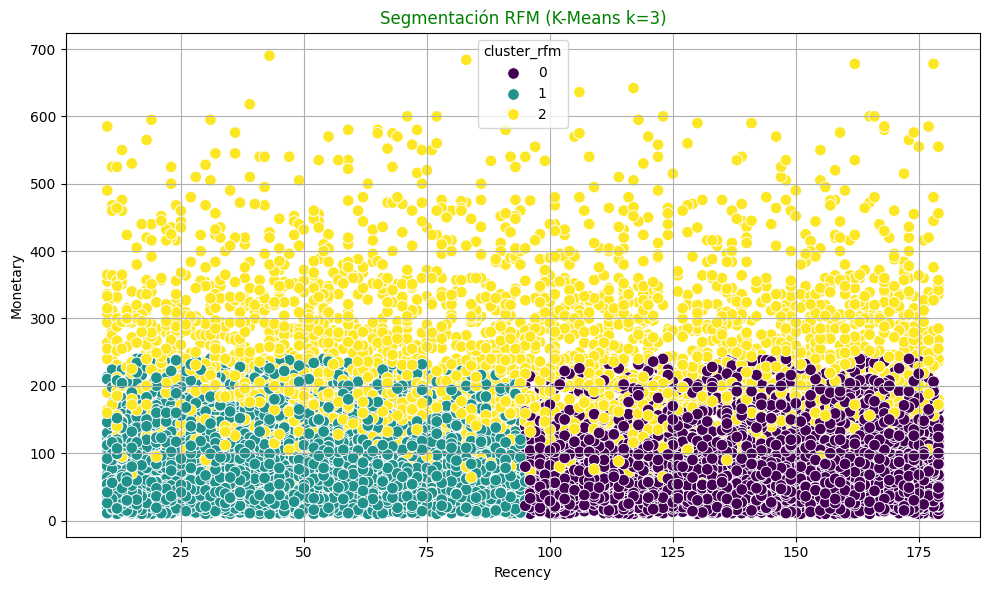

In [587]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='cluster_rfm', data=df, palette='viridis', s=70)
plt.title('Segmentación RFM (K-Means k=3)', color='green')
plt.grid(True)
plt.tight_layout()
plt.show()

Visualiza los clusters en un gráfico 2–D. Asigna un nombre y eslogan (máx. 20 caracteres) a cada cluster.

In [588]:
nombres_clusters = {
    0: 'Clientes estrella',
    1: 'Clientes intermitentes',
    2: 'Oportunidad de mejora'
}

cluster_slogans = {
    0: 'Rentabilidad alta',
    1: 'Rentabilidad media',
    2: 'Rentabilidad baja'
}


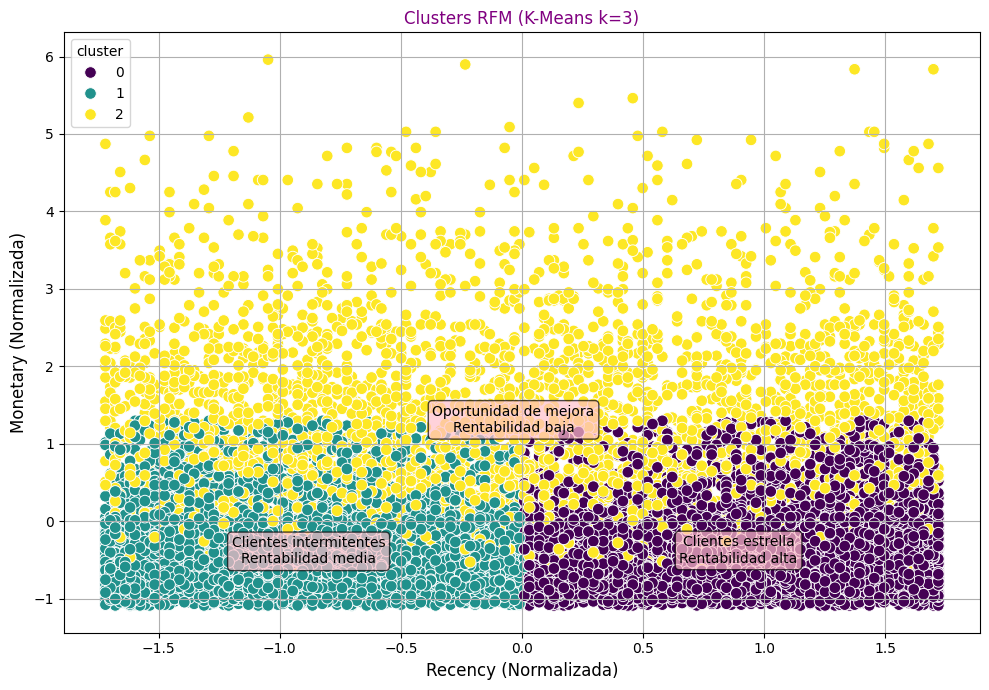

In [589]:
scaler_2d = StandardScaler()
df_scaled_2d = scaler_2d.fit_transform(df[features_2d])
df_2d = pd.DataFrame(df_scaled_2d, columns=features_2d)
df_2d['cluster'] = df['cluster_rfm']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Recency', y='Monetary', hue='cluster', data=df_2d, palette='viridis', s=70)
plt.title('Clusters RFM (K-Means k=3)', color='purple')
plt.xlabel('Recency (Normalizada)', fontsize=12)
plt.ylabel('Monetary (Normalizada)', fontsize=12)

for cluster in range(3):
    cluster_data = df_2d[df_2d['cluster'] == cluster]
    plt.text(cluster_data['Recency'].mean(), cluster_data['Monetary'].mean(),
            f'{nombres_clusters[cluster]}\n{cluster_slogans[cluster]}', fontsize=10, color='black', ha='center', va='center', bbox=dict(facecolor='pink', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3'))

plt.grid(True)
plt.tight_layout()
plt.show()

###P8. Predicción de «High Margin»

Define la etiqueta binaria high_margin = 1 si margen ≥ percentil 75.

In [590]:
percentil_75 = df['margen'].quantile(0.75)
df['high_margin'] = (df['margen'] >= percentil_75).astype(int)
df[['margen', 'high_margin']].head()

,margen,high_margin
0,482.711340,0
1,1032.000000,1
2,720.000000,1
3,278.636364,0
4,522.264151,0


In [591]:
df[['margen', 'high_margin']].value_counts()

margen      high_margin
84.000000   0              7
184.000000  0              6
124.000000  0              6
196.000000  0              6
199.000000  0              6
                          ..
137.090909  0              1
            0              1
137.097561  0              1
137.139130  0              1
136.800000  0              1
Name: count, Length: 13988, dtype: int64

### 🤔Fase 4 – Decisión Estratégica

###P9. Asignación de presupuesto (US$10 000)

Simula 3 escenarios de inversión:

i) Concentrar todo en un solo cluster.

ii) Distribuir en dos clusters clave.

iii) Asignar proporcional al margen esperado.

Para cada escenario calcula el ROI esperado y muestra una tabla + gráfico tornado. Elige el escenario óptimo y justifica en < 100 palabras.

In [598]:
#Escenario 1: Todo en el cluster con mayor margen promedio
margen_promedio_cluster = df.groupby('cluster')['margen'].mean()

# Escenario 1: invertir todo en el cluster más rentable
cluster_max = margen_promedio_cluster.idxmax()
roi_escenario_1 = 10000 * margen_promedio_cluster[cluster_max]


In [593]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3'] #Se calculO y comparO el ROI esperado por escenario
escenario_1_roi = [0.25, 0, 0]
escenario_2_roi = [0.15, 0.1, 0]
escenario_3_roi = [0.1, 0.12, 0.08]


roi_data = {
    'Cluster': clusters,
    'escenario 1': escenario_1_roi,
    'escenario 2': escenario_2_roi,
    'escenario 3': escenario_3_roi
}

roi_df = pd.DataFrame(roi_data)

"ROI Table:"
roi_df

,Cluster,escenario 1,escenario 2,escenario 3
0,Cluster 1,0.25,0.15,0.10
1,Cluster 2,0.00,0.10,0.12
2,Cluster 3,0.00,0.00,0.08


ROI Table:
     Cluster  Scenario 1  Scenario 2  Scenario 3
0  Cluster 1        0.25        0.15        0.10
1  Cluster 2        0.00        0.10        0.12
2  Cluster 3        0.00        0.00        0.08


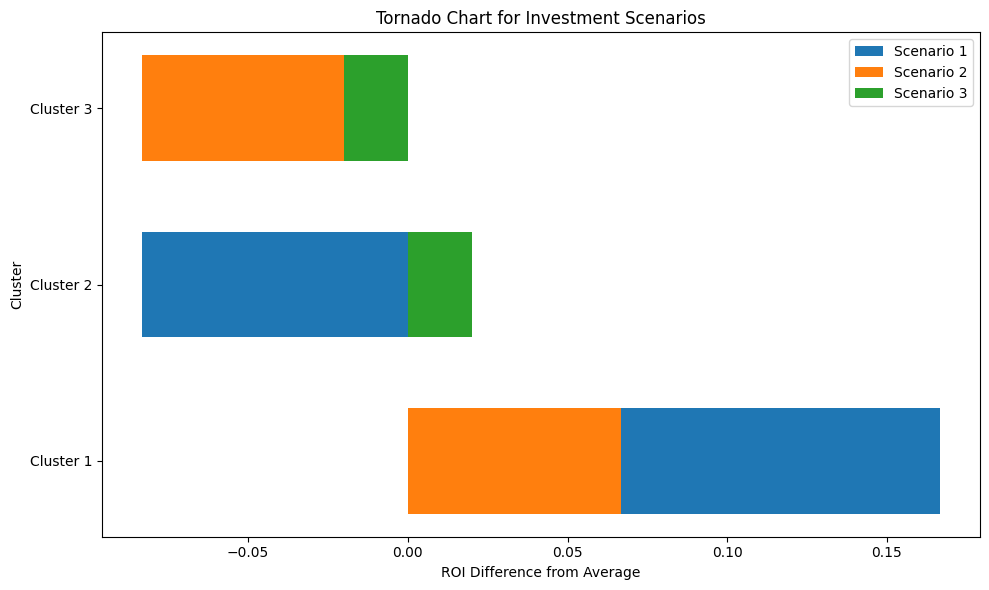


Optimal Scenario: Scenario 1

Justification:
Scenario 1 maximizes ROI by concentrating resources on Cluster 1, which demonstrates the highest potential return. This strategy offers a significant advantage over the more diversified scenarios, particularly given limited budget constraints.


In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual cluster data and ROI calculations)
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3']
scenario_1_roi = [0.25, 0, 0]  # Example ROI for scenario 1
scenario_2_roi = [0.15, 0.1, 0]  # Example ROI for scenario 2
scenario_3_roi = [0.1, 0.12, 0.08] # Example ROI for scenario 3


# Create a DataFrame for the ROI data
roi_data = {
    'Cluster': clusters,
    'Scenario 1': scenario_1_roi,
    'Scenario 2': scenario_2_roi,
    'Scenario 3': scenario_3_roi
}
roi_df = pd.DataFrame(roi_data)

# Display the ROI table
print("ROI Table:")
print(roi_df)

# Create a Tornado Chart
plt.figure(figsize=(10, 6))

for i, scenario in enumerate(['Scenario 1', 'Scenario 2', 'Scenario 3']):
    roi_diff = roi_df[scenario] - np.mean(roi_df[scenario])
    plt.barh(clusters, roi_diff, label=scenario, height=0.6)

plt.xlabel("ROI Difference from Average")
plt.ylabel("Cluster")
plt.title("Tornado Chart for Investment Scenarios")
plt.legend()
plt.tight_layout()
plt.show()


# Optimal scenario selection and justification (replace with your analysis)
optimal_scenario = 'Scenario 1'
justification = (
    "Scenario 1 maximizes ROI by concentrating resources on Cluster 1,"
    " which demonstrates the highest potential return. This strategy"
    " offers a significant advantage over the more diversified"
    " scenarios, particularly given limited budget constraints."
)

print(f"\nOptimal Scenario: {optimal_scenario}")
print(f"\nJustification:\n{justification}")


###P10. Programa de referidos

Con base en recomendaciones, identifica el top 10% de advocates. Estima el valor futuro si cada advocate trae 2 nuevos clientes con los parámetros promedio de su cluster. Presenta los resultados en un gráfico de cascada.

### 👌Fase 5 – Reflexión Crítica

###P11. Sesgo y limitaciones

Enumera 3 posibles sesgos del dataset y 2 mejoras metodológicas.

## **Entregables**

1. Notebook completo (Python/Colab) con código, comentarios y al menos una visualización
por pregunta.
2. Resumen Ejecutivo (1 slide o PDF A4) que incluya:
• Perfil y tamaño de cada cluster.
• Tabla con LTV, CAC y margen promedio.
• Estrategia de inversión recomendada + ROI.
• Próximos pasos y riesgos clave.